In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [18]:

import idx2numpy
import numpy as np

def read_idx_file(file_path):
    # Read the IDX file and return as a NumPy array
    return idx2numpy.convert_from_file(file_path)

# File paths
train_images_file = 'train-images-idx3-ubyte'
train_labels_file = 'train-labels-idx1-ubyte'
test_images_file = 't10k-images-idx3-ubyte'
test_labels_file = 't10k-labels-idx1-ubyte'

# Read the IDX files
x_train = read_idx_file(train_images_file)
y_train = read_idx_file(train_labels_file)
x_test = read_idx_file(test_images_file)
y_test = read_idx_file(test_labels_file)

# Now you can use the NumPy arrays (train_images, train_labels, test_images, test_labels) for further processing.

# # Load the Fashion MNIST dataset
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:

# Assuming y_train contains the labels for your training data
num_categories = len(np.unique(y_train))

# Choose the classes you want to keep (in this example, keeping the first 5 classes)
selected_classes = np.unique(y_train)[:5]

# Filter x_train and y_train to keep only the selected classes
selected_indices = np.isin(y_train, selected_classes)
x_train = x_train[selected_indices]
y_train = y_train[selected_indices]

# Check the updated number of categories
num_updated_categories = len(np.unique(y_train))
print("Updated number of categories:", num_updated_categories)

# Optionally, you can also reduce the size of x_train if needed
# In this example, keeping only the first 1000 samples
x_train = x_train[:5000]
y_train = y_train[:5000]

print("Shape of x_train:", x_train.shape)
# Now, x_train_selected and y_train_selected contain the reduced dataset

print("Shape of y_train:", y_train.shape)
# Now, x_train_selected and y_train_selected contain the reduced dataset


Updated number of categories: 5
Shape of x_train: (5000, 28, 28)
Shape of y_train: (5000,)
Updated number of categories: 5
Shape of x_train: (5000, 28, 28)
Shape of y_train: (5000,)


In [20]:
# Preprocessing
# Flatten the input images
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Normalize pixel values to be between 0 and 1
x_train_flat = x_train_flat.astype('float32') / 255

# Reshape y_train to 1D array (no one-hot encoding)
y_train = y_train.reshape(-1)

# # Convert class vectors to binary class matrices (one-hot encoding)
# y_train_one_hot = to_categorical(y_train, 10)
# y_test_one_hot = to_categorical(y_test, 10)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

# Now, preprocess the test data (x_test)
# Flatten the input images for test data
x_test_flat = x_val.reshape(x_val.shape[0], -1)

# Normalize pixel values to be between 0 and 1 for test data
x_test_flat = x_test_flat.astype('float32') / 255

In [21]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_val_std = scaler.transform(x_val)
x_test_std = scaler.transform(x_test_flat)

In [22]:
# Apply PCA for dimensionality reduction  , noise reduction and feature extraction.
from sklearn.decomposition import PCA
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_std)
x_val_pca = pca.transform(x_val_std)
x_test_pca = pca.transform(x_test_std)


In [23]:
# x_train_pca=x_train
# x_val_pca=x_val
# Create and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(x_train_pca, y_train)

C:\Users\Yara\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\Yara\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Make predictions on the validation set
y_val_pred = logistic_model.predict(x_val_pca)

# Evaluate the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val * 100:.2f}%')


Validation Accuracy: 87.90%
Validation Accuracy: 87.90%


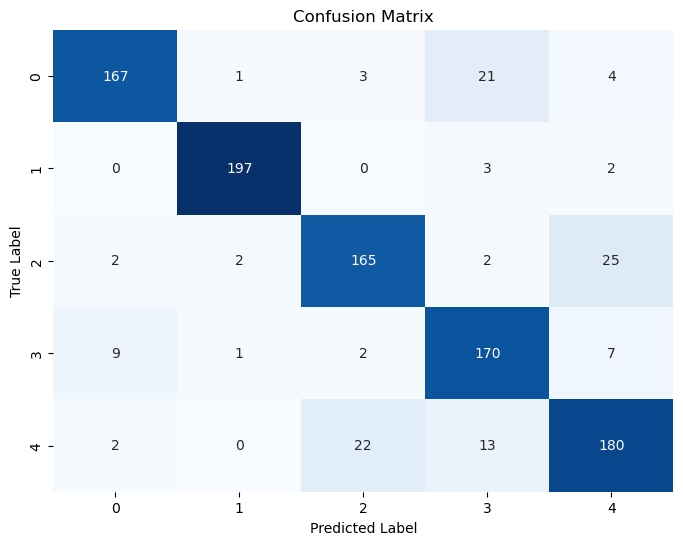

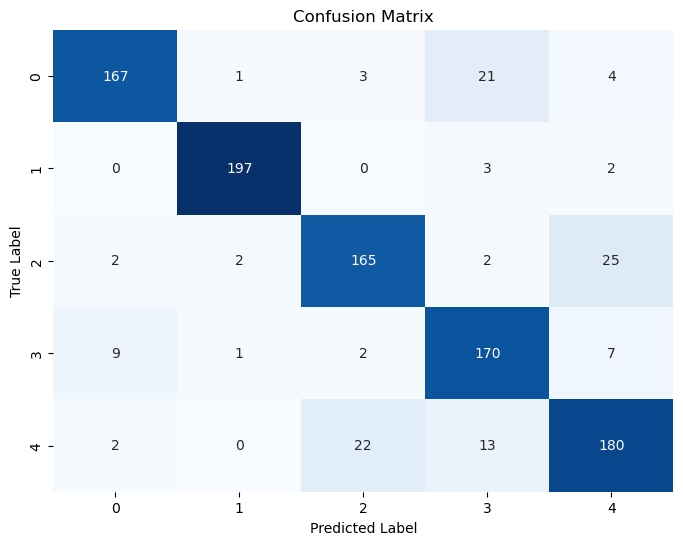

In [25]:
# Plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

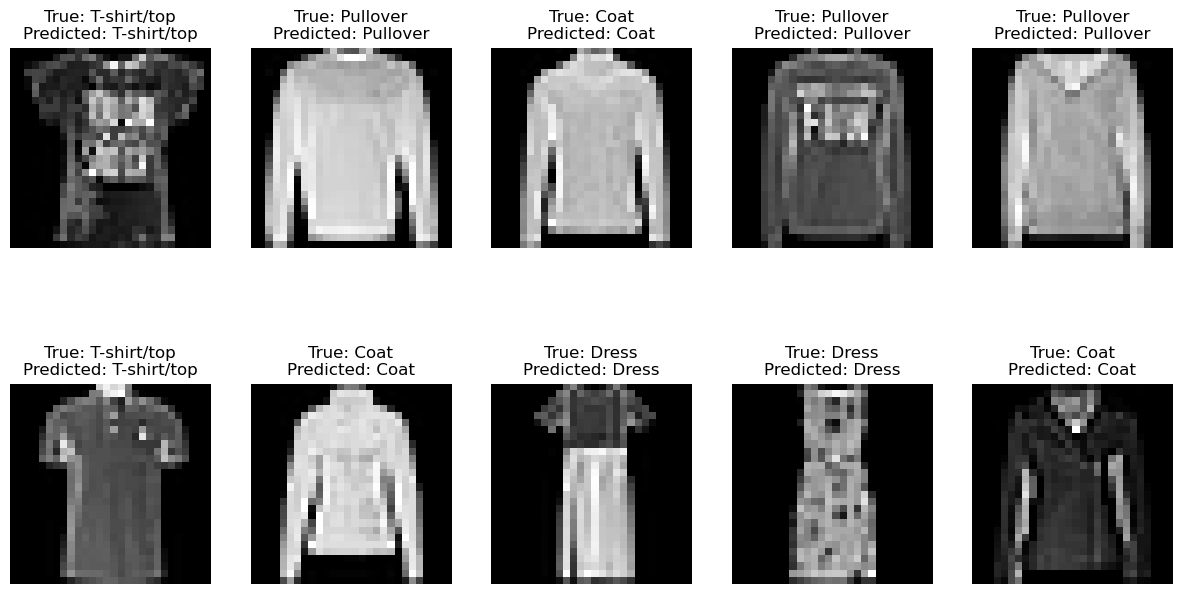

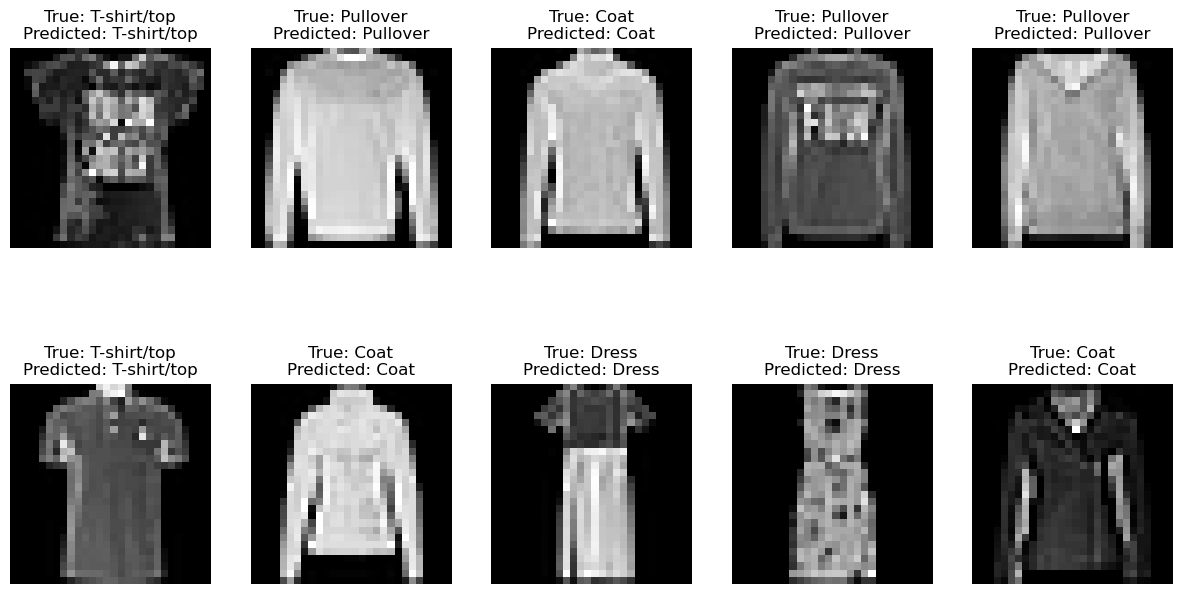

In [26]:
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',

}
# Show some correctly predicted images
correctly_predicted_indices = np.where(y_val == y_val_pred)[0]
# Show some correctly predicted images
num_examples_to_show = 10

plt.figure(figsize=(15, 8))
for i in range(num_examples_to_show):
    plt.subplot(2, num_examples_to_show // 2, i + 1)  # Adjusted subplot parameters
    index = correctly_predicted_indices[i]
    plt.imshow(x_val[index].reshape(28, 28), cmap='gray')
    true_label = class_names[y_val[index]]
    predicted_label = class_names[y_val_pred[index]]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()

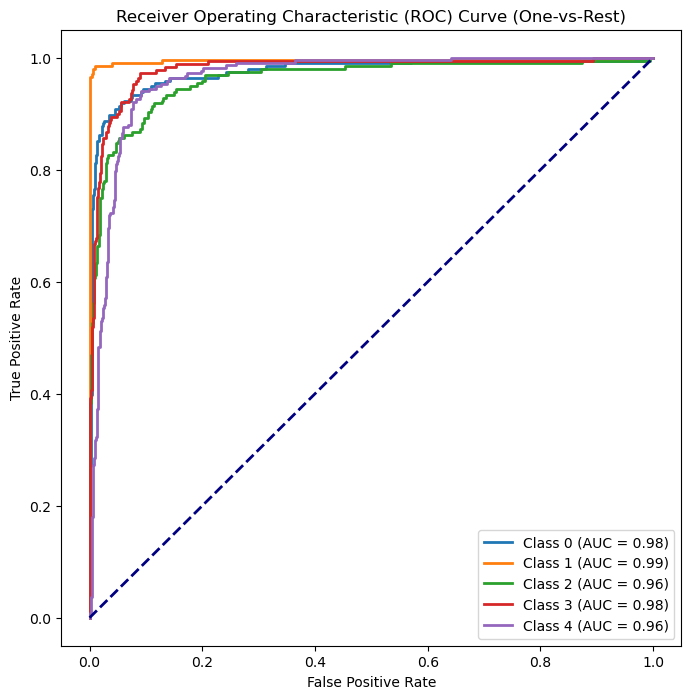

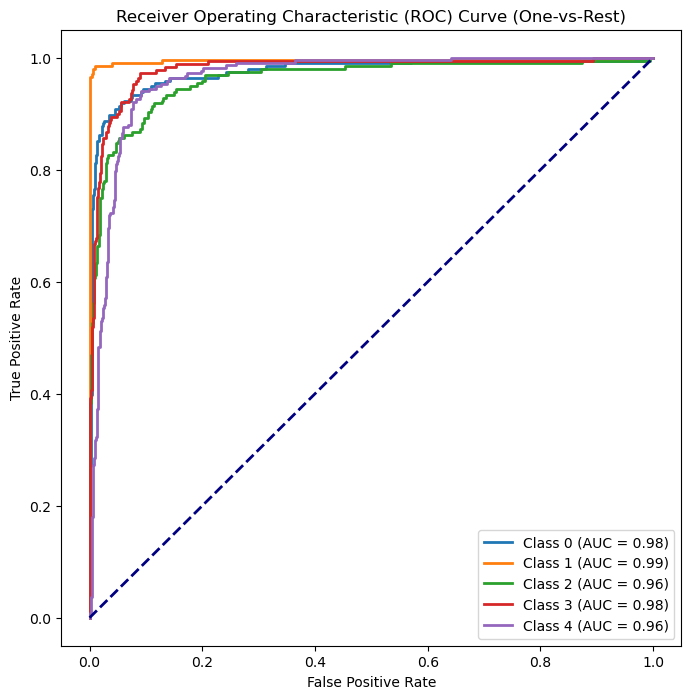

In [27]:
# Compute ROC curve and AUC for each class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# Binarize the labels for multiclass ROC
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_val_bin = label_binarize(y_val, classes=np.unique(y_train))
# Predict probabilities on the validation set
y_val_probs = logistic_model.predict_proba(x_val_pca)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Create a range of C values to explore
C_values = np.logspace(-3, 3, 7)

# Lists to store loss and accuracy values
loss_values = []
train_accuracies = []
val_accuracies = []

for C in C_values:
    # Create and train Logistic Regression model
    logistic_model = LogisticRegression(max_iter=200, C=C)
    logistic_model.fit(x_train_pca, y_train)

    # Calculate negative log-likelihood (loss)
    loss = -logistic_model.score(x_train_pca, y_train)
    loss_values.append(loss)

    # Make predictions on training set
    y_train_pred = logistic_model.predict(x_train_pca)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on validation set
    y_val_pred = logistic_model.predict(x_val_pca)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)


C:\Users\Yara\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yara\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

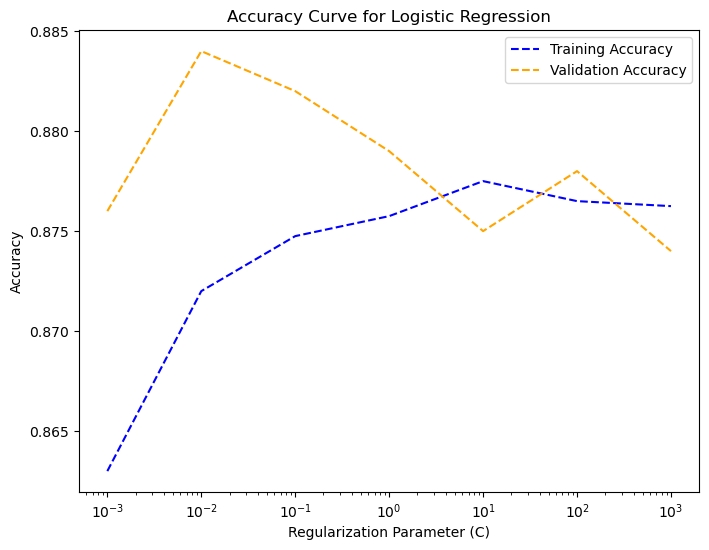

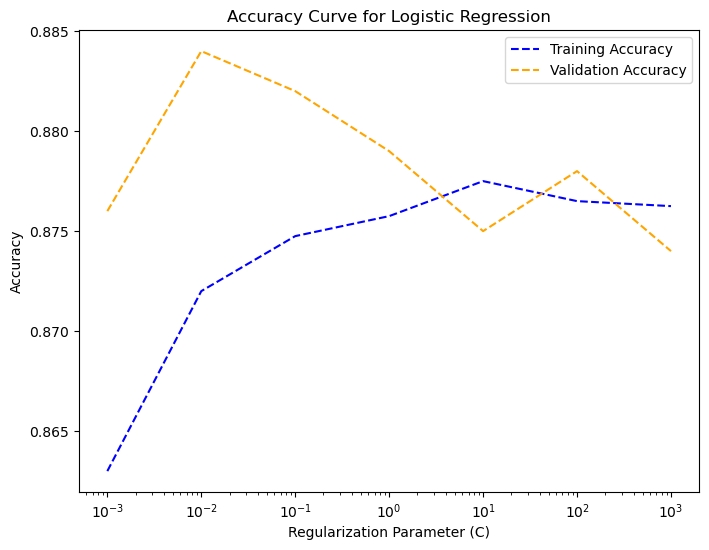

In [29]:
# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', linestyle='dashed', color='blue')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', linestyle='dashed', color='orange')
plt.xscale('log')  # Use a log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Logistic Regression')
plt.legend()
plt.show()

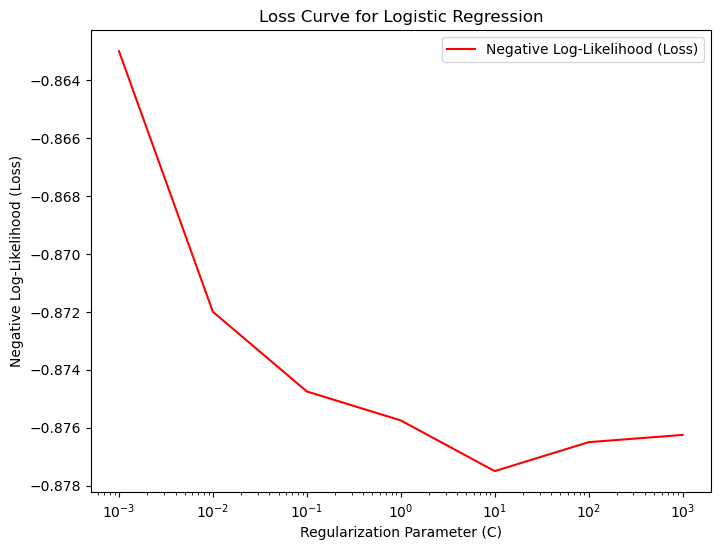

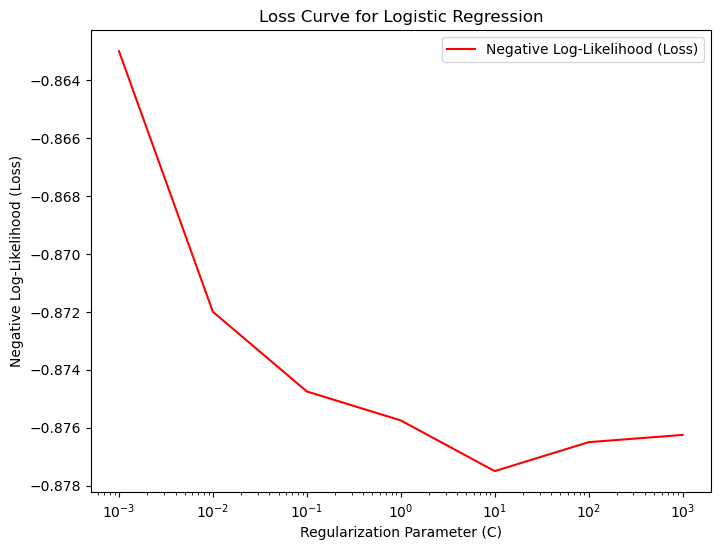

In [30]:
# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(C_values, loss_values, label='Negative Log-Likelihood (Loss)', color='red')
plt.xscale('log')  # Use a log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Negative Log-Likelihood (Loss)')
plt.title('Loss Curve for Logistic Regression')
plt.legend()
plt.show()